In [10]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression



In [11]:
# Retrieve Stock Information from Quandl

quandl.ApiConfig.api_key = '_vwyzz3JFVgCXPgRpZbX'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]

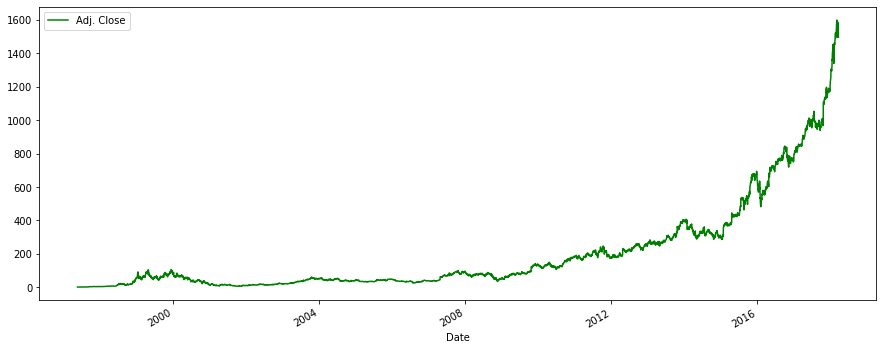

In [13]:
# Plot Stock Information

df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [20]:
# Set Parameters for Prediction

forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

C:\Users\ohuss\AppData\Local\Temp/ipykernel_1824/183587925.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))


In [24]:
# Split Data for Testing and Training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print (forecast_predicted)

[1503.52304279 1542.45932369 1553.87168188 1539.94455568 1560.89385186
 1576.41934756 1578.38001414 1594.61944821 1618.00892182 1607.38509257
 1607.88591502 1587.63990141 1594.88584312 1619.77778406 1634.72786674
 1642.57053306 1649.88040955 1678.68302785 1699.46183129 1688.58226292
 1691.58719757 1682.3379661  1671.00019848 1642.49594248 1686.80274488
 1681.84779945 1641.61151136 1589.8882745  1654.1427282  1591.4759882 ]


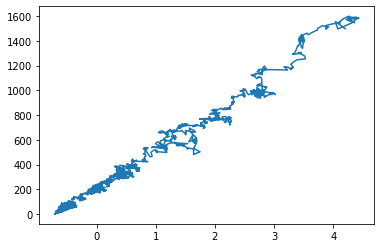

In [22]:
# Visualize Prediction Model

plt.plot(X, y)

NameError: name 'datetime' is not defined

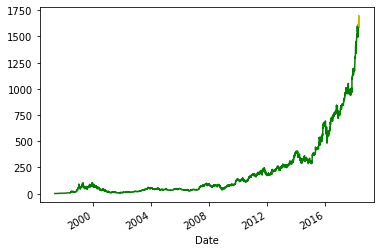

In [37]:
# Adjust Plot to Analyze Prediction

dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color="y")
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017, 4, 26))